In [35]:
import scanpy as sc
import scFates as scf

In [36]:
adata=sc.read("adata_tree.h5ad")

In [3]:
r="stem"
m=["A","B"]

In [4]:
scf.tl.test_fork(adata,r,m,n_jobs=40,rescale=True)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only.
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 2135/2135 [00:31<00:00, 67.42it/s]
    test for upregulation for each leave vs root
    upreg B: 100%|██████████| 1233/1233 [00:02<00:00, 542.03it/s]
    finished (0:00:36) --> added 
    .uns['stem->A<>B']['fork'], DataFrame with fork test results.


In [5]:
scf.tl.branch_specific(adata,r,m,effect=.2)

    branch specific features: B: 85, A: 54
    finished --> updated 
    .uns['stem->A<>B']['fork'], DataFrame updated with additionnal 'branch' column.


In [14]:
scf.tl.activation(adata,r,m,deriv_cut=0.1,n_jobs=80,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [02:49<00:00,  1.70s/it]
    threshold pseudotime is: 18.056855790002874
    28 early and 26 late features specific to leave A
    64 early and 21 late features specific to leave B
    finished (0:02:49) --> updated 
    .uns['stem->A<>B']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


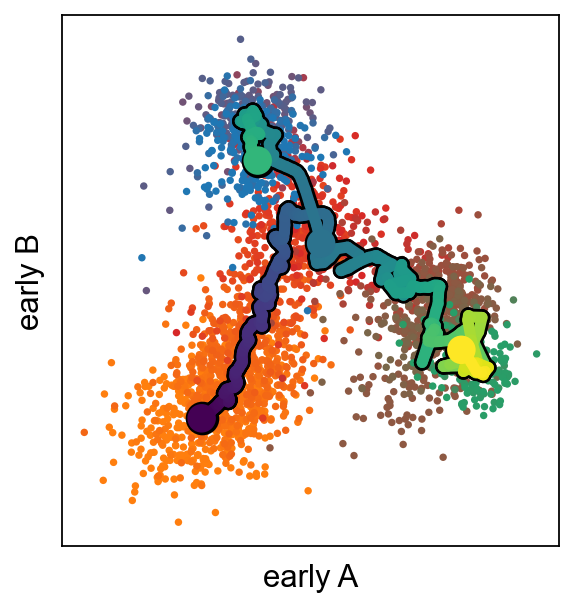

In [27]:
sc.set_figure_params()
scf.pl.modules(adata,r,m,show_traj=True,module="early")

In [15]:
scf.tl.slide_cells(adata,r,m,win=100)

--> added 
    .uns['stem->A<>B']['cell_freq'], probability assignment of cells on 31 non intersecting windows.


In [16]:
scf.tl.slide_cors(adata,r,m)

--> added 
    .uns['stem->A<>B']['corAB'], gene-gene correlation modules.


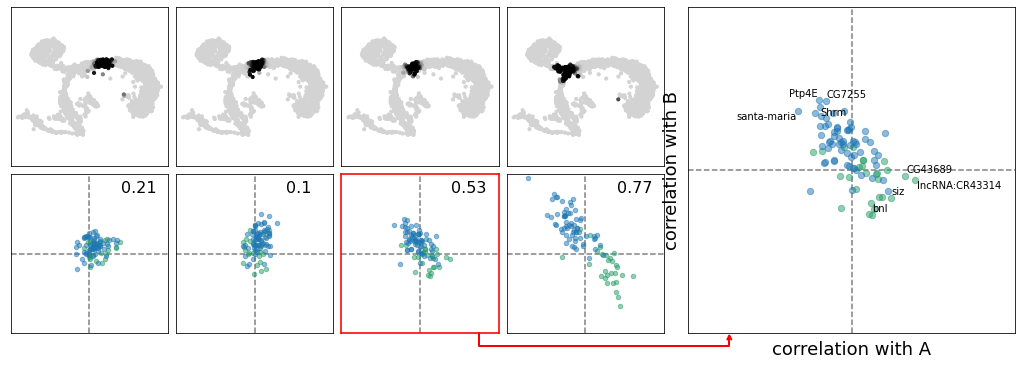

In [17]:
scf.pl.slide_cors(adata,r,m,win_keep=[11,12,13,14],focus=2)

In [28]:
scf.tl.synchro_path(adata,r,m,w=50,winp=30,step=15,knots=5,n_jobs=40,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:37<00:00,  2.63it/s]
    finished (0:01:32) --> added 
    .uns['stem->A<>B']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor stem->A<>B'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


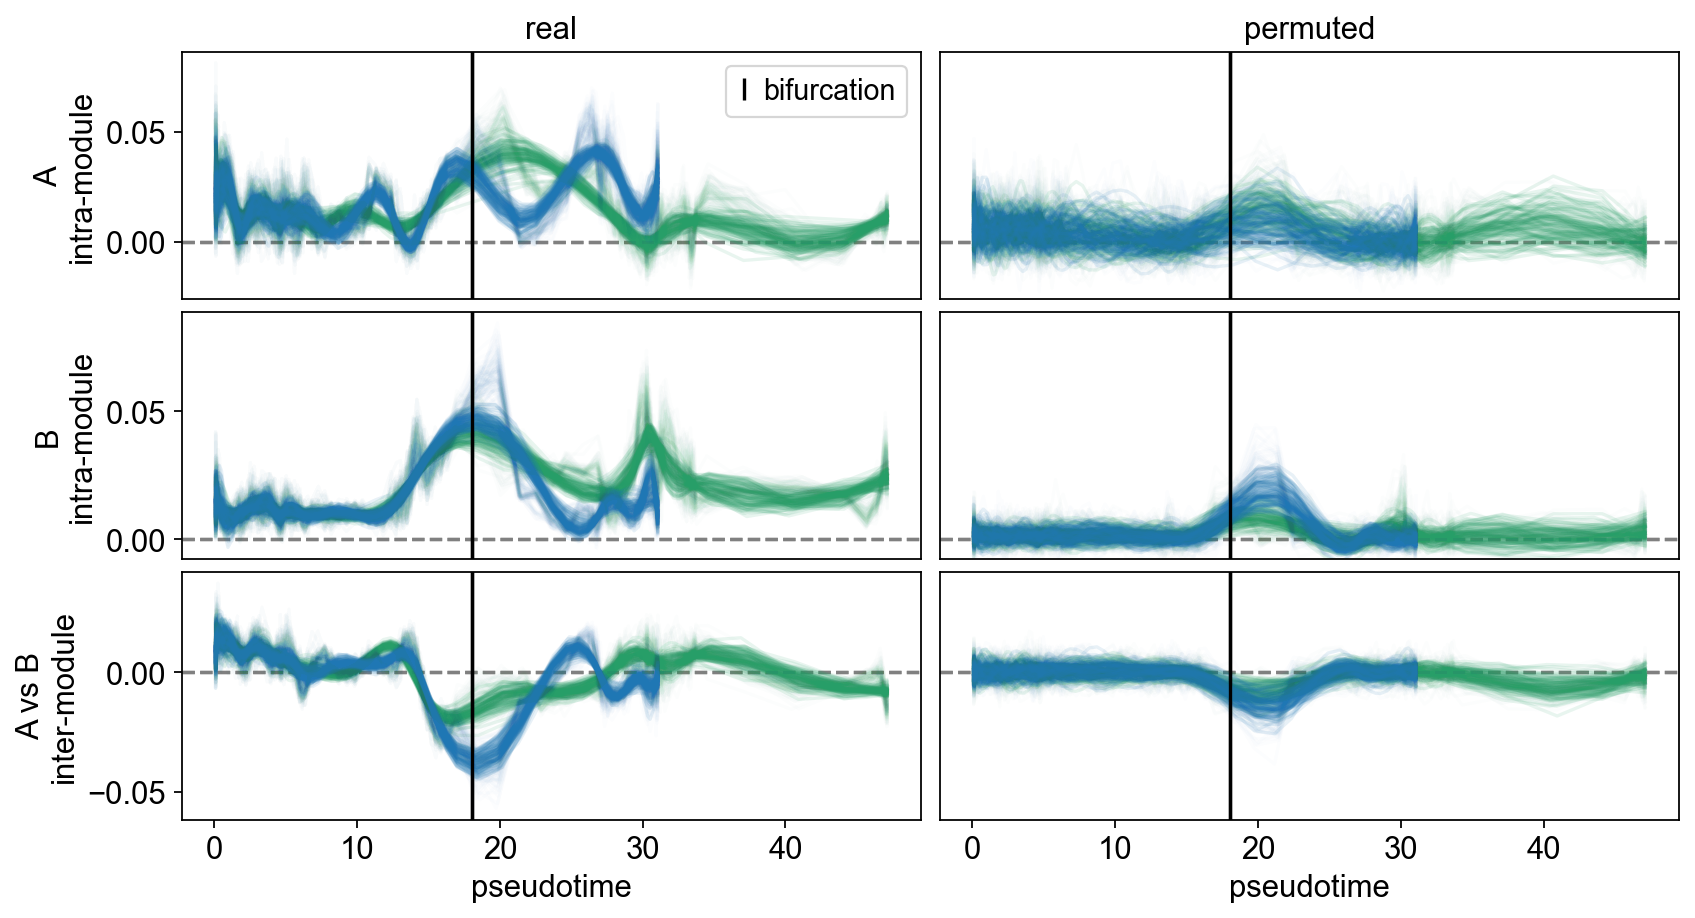

In [29]:
scf.pl.synchro_path(adata,r,m,knots=20)

In [30]:
adata.write("adata_final.h5ad")